In [113]:
import pandas as pd
import nltk
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('sentiwordnet')


[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\ns022927\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [114]:
! pip install ggplot
! pip install plotting
! pip install --upgrade pandas
! pip install scikit-plot

Looking in indexes: https://cernerrepos.net/api/pypi/python-integration/simple
Looking in indexes: https://cernerrepos.net/api/pypi/python-integration/simple
Looking in indexes: https://cernerrepos.net/api/pypi/python-integration/simple


Looking in indexes: https://cernerrepos.net/api/pypi/python-integration/simple


In [115]:
# Load data from the csv
review_df = pd.read_csv("data/reviewsBatch100k.csv", header=0)

In [116]:
#Tokenize the text

def penn_to_wn(tag):
    """
        Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

def preprocessing(text: str) -> str :
    #Tokenize the text 
    sentences = sent_tokenize(text)
    # Lemmatize the text
    for sentence in sentences:
        print(sentence)
        tokens = TreebankWordTokenizer().tokenize(text)
        tags = pos_tag(tokens)
        for word,tag in tags:
             wn_tag = penn_to_wn(tag)
             if not wn_tag:
                 continue
             lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
             if not lemma:
                 continue


In [118]:
review_df.head()

,Unnamed: 0,user,playtime,user_url,post_date,helpfulness,review,recommend,early_access_review
0,0,Airi,2074.1,https://steamcommunity.com/id/susan/,"February 19, 2022",21,trash. cheaters everywhere,Not Recommended,NaN
1,1,Apple Fanta ☁,154.7,https://steamcommunity.com/id/applefantaZA/,"February 17, 2022",6,"𝙜𝙧𝙚𝙖𝙩 𝙜𝙖𝙢𝙚, 𝙧𝙪𝙞𝙣𝙚𝙙 𝙗𝙮 𝙘𝙝𝙚𝙖𝙩𝙚𝙧𝙨.",Recommended,NaN
2,2,(!@#$%^&*),882.1,https://steamcommunity.com/id/slickhoe/,"February 22, 2022",7,"𝙜𝙧𝙚𝙖𝙩 𝙜𝙖𝙢𝙚, 𝙧𝙪𝙞𝙣𝙚𝙙 𝙗𝙮 𝙘𝙝𝙚𝙖𝙩𝙚𝙧𝙨.",Recommended,NaN
3,3,Teelo,88.4,https://steamcommunity.com/id/teeloxd/,"February 19, 2022",4,10/10 Gambling,Recommended,NaN
4,4,PRIMATE69,1299.2,https://steamcommunity.com/profiles/7656119909...,"February 17, 2022",3,muy buen juego! muy bueno! la verdad que muy b...,Recommended,NaN


In [119]:
#What is the ratio of positive to negative reviews?
print(review_df['recommend'].unique())
review_df[review_df["recommend"] == 'Not Recommended']

['Not Recommended' 'Recommended']


,Unnamed: 0,user,playtime,user_url,post_date,helpfulness,review,recommend,early_access_review
0,0,Airi,2074.1,https://steamcommunity.com/id/susan/,"February 19, 2022",21,trash. cheaters everywhere,Not Recommended,NaN
6,6,Commander Appo,299.1,https://steamcommunity.com/profiles/7656119813...,"February 17, 2022",5,i was having the time of my life until they ba...,Not Recommended,NaN
9,9,Radikall,250.7,https://steamcommunity.com/id/radikall/,"February 22, 2022",2,اشتباه نریکوس مادرت از این وره ↖,Not Recommended,NaN
19,19,SALTY,37.4,https://steamcommunity.com/id/flexici0n/,"February 19, 2022",2,gay,Not Recommended,NaN
26,26,ArcanePan,1669.9,https://steamcommunity.com/id/arcanethebestgoo...,"February 18, 2022",2,one pixel of your crosshair off the head of th...,Not Recommended,NaN
...,...,...,...,...,...,...,...,...,...
102316,102316,steele,3228.5,https://steamcommunity.com/id/steelej/,"February 15, 2022",0,"game sucks its full of cheaters, and the devs ...",Not Recommended,NaN
102323,102323,RanDOOMPuff,177.9,https://steamcommunity.com/id/penispoonis420/,"February 15, 2022",0,Boring,Not Recommended,NaN
102325,102325,attaboydanny,27.2,https://steamcommunity.com/profiles/7656119844...,"February 15, 2022",0,hackers go brrrrrrrr,Not Recommended,NaN
102336,102336,I LOVE LEAN!!!,20.9,https://steamcommunity.com/id/hosct/,"February 15, 2022",0,u aasdf,Not Recommended,NaN


In [120]:
def get_sentiment_score(text):
    
    """
        This method returns the sentiment score of a given text using SentiWordNet sentiment scores.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0
    #print(text)
    try:
        raw_sentences = sent_tokenize(text)
    except:
            print(text)
    #print(raw_sentences)
    
    for sentence in raw_sentences:
        sent_score = 0     
        sentence = str(sentence)
        #print(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        try:
            tokens = TreebankWordTokenizer().tokenize(text)
        except:
            print(text)
        tags = pos_tag(tokens)
        for word, tag in tags:
            wn_tag = penn_to_wn(tag)
            if not wn_tag:
                continue
            lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sent_score += swn_synset.pos_score() - swn_synset.neg_score()

        total_score = total_score + (sent_score / len(tokens))
    
    return (total_score / len(raw_sentences)) * 100

In [121]:
review_df = review_df.dropna(subset={"review"})

In [214]:
results = review_df["review"].apply(lambda text : get_sentiment_score(text))
type(results)

pandas.core.series.Series

In [123]:
normalized_results = (results - min(results))
normalized_results = (normalized_results / max(normalized_results))

In [124]:
pd.crosstab(results > 0, review_df['recommend'] == "Recommended", rownames=['Actual'], colnames=['Predicted'])

Predicted,False,True
Actual,,
False,8085,43090
True,3570,47123


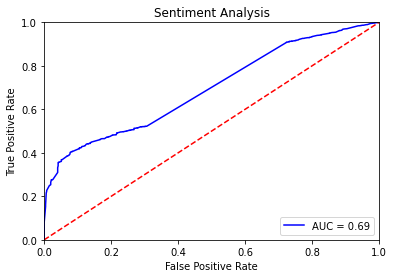

In [125]:
import sklearn.metrics as metrics
from pandas import Timestamp
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict_proba(X_test)
#preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(review_df['recommend'] == "Recommended", normalized_results, drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Sentiment Analysis')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [126]:
# Build train/test set
def prepare_data(text):
    
    """
        This method returns the sentiment score of a given text using SentiWordNet sentiment scores.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """   
    lemma_list = []
    try:
        raw_sentences = sent_tokenize(text)
    except:
            print(text)
    
    for sentence in raw_sentences:
        sent_score = 0     
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        try:
            tokens = TreebankWordTokenizer().tokenize(text)
        except:
            print(text)
        tags = pos_tag(tokens)
        for word, tag in tags:
            wn_tag = penn_to_wn(tag)
            if not wn_tag:
                continue
            lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
            lemma_list.append(lemma)
    
    return lemma_list

In [129]:
import random
#Create positive and negative sets
positive_reviews = review_df[review_df['recommend'] == "Recommended"]['review']
negative_reviews = review_df[review_df['recommend'] == "Not Recommended"]['review']

positive_tokens = positive_reviews.apply(lambda text : prepare_data(text))
negative_tokens = negative_reviews.apply(lambda text : prepare_data(text))

In [138]:
def generate_dataset(cleaned_tokens_list, label):
    for tokens in cleaned_tokens_list:
        yield dict([token, label] for token in tokens)

In [200]:
positive_dict = [(item, "Positive")
                     for item in generate_dataset(positive_tokens, True)]
negative_dict = [(item, "Negative")
                     for item in generate_dataset(negative_tokens, True)]

In [201]:
dataset = positive_dict + negative_dict
random.shuffle(dataset)

train_data = dataset[:70000]
test_data = dataset[70000:]

In [202]:
review_df["review"].apply(lambda text : prepare_data(text))

0         [trash., cheater, everywhere, trash., cheater,...
1                       [𝙜𝙧𝙚𝙖𝙩, 𝙜𝙖𝙢𝙚, 𝙧𝙪𝙞𝙣𝙚𝙙, 𝙗𝙮, 𝙘𝙝𝙚𝙖𝙩𝙚𝙧𝙨]
2                       [𝙜𝙧𝙚𝙖𝙩, 𝙜𝙖𝙢𝙚, 𝙧𝙪𝙞𝙣𝙚𝙙, 𝙗𝙮, 𝙘𝙝𝙚𝙖𝙩𝙚𝙧𝙨]
3                                                [Gambling]
4         [muy, buen, juego, muy, bueno, la, que, muy, b...
                                ...                        
102351                                                  [z]
102352                                          [best, fps]
102353                                      [i, hate, game]
102354                                     [da, guud, geim]
102355    [step, become, good, player, c, go, peak, get,...
Name: review, Length: 101868, dtype: object

In [203]:
#Train a custom naive bayes classifier
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

Accuracy is: 0.905139952303251
Most Informative Features
                terrible = True           Negati : Positi =     39.0 : 1.0
                   touch = True           Negati : Positi =     32.8 : 1.0
                    room = True           Negati : Positi =     29.6 : 1.0
                  stupid = True           Negati : Positi =     29.3 : 1.0
                      не = True           Negati : Positi =     27.5 : 1.0
                 regular = True           Negati : Positi =     27.0 : 1.0
                   alone = True           Negati : Positi =     26.4 : 1.0
                  aspect = True           Negati : Positi =     25.7 : 1.0
                  matter = True           Negati : Positi =     25.1 : 1.0
               teammates = True           Negati : Positi =     24.5 : 1.0
None


In [226]:
results = []
labels = []
for i in test_data:
    results.append(classifier.prob_classify(i[0]).prob('Positive'))
    labels.append(1 if i[1] == 'Positive' else 0)

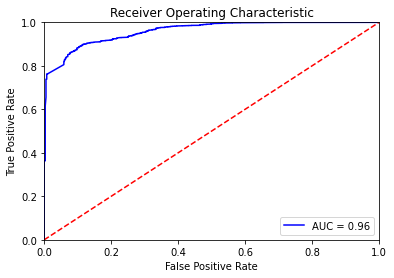

In [227]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds = results
fpr, tpr, threshold = metrics.roc_curve(labels, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [229]:
pd.crosstab(np.array(clean_results), np.array(labels), rownames = ['clean_results'], colnames = ['labels'])

labels,0,1
clean_results,,
0,2385,833
1,1194,27456


In [207]:
sum(results) / len(results)

0.8034065838521784

In [190]:
# To recap, show the individual steps
my_string = "This is a test string. It's filled with interesting tidbits! Peter Piper picked a pickle pickle. Is it a good string or a bad string?"
tokens = TreebankWordTokenizer().tokenize(my_string)
print("All tokens: " + str(tokens) + "\n")
tags = pos_tag(tokens)
print("All tags: " + str(tags)+ "\n")
for word, tag in tags:
    wn_tag = penn_to_wn(tag)
    if not wn_tag:
        print("No tag for: " + word)
        continue
    lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
    print(lemma)
    if not lemma:
        print("Skipping " + word)
        continue
    synsets = wn.synsets(lemma, pos=wn_tag)
    if not synsets:
        continue
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())
    sent_score = swn_synset.pos_score() - swn_synset.neg_score()
    print(sent_score)
    


All tokens: ['This', 'is', 'a', 'test', 'string.', 'It', "'s", 'filled', 'with', 'interesting', 'tidbits', '!', 'Peter', 'Piper', 'picked', 'a', 'pickle', 'pickle.', 'Is', 'it', 'a', 'good', 'string', 'or', 'a', 'bad', 'string', '?']

All tags: [('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('test', 'NN'), ('string.', 'NN'), ('It', 'PRP'), ("'s", 'VBZ'), ('filled', 'VBN'), ('with', 'IN'), ('interesting', 'JJ'), ('tidbits', 'NNS'), ('!', '.'), ('Peter', 'NNP'), ('Piper', 'NNP'), ('picked', 'VBD'), ('a', 'DT'), ('pickle', 'NN'), ('pickle.', 'NN'), ('Is', 'VBZ'), ('it', 'PRP'), ('a', 'DT'), ('good', 'JJ'), ('string', 'NN'), ('or', 'CC'), ('a', 'DT'), ('bad', 'JJ'), ('string', 'NN'), ('?', '.')]

No tag for: This
be
0.125
No tag for: a
test
0.125
string.
No tag for: It
's
fill
0.0
No tag for: with
interesting
0.375
tidbit
0.0
No tag for: !
Peter
0.0
Piper
0.0
pick
0.0
No tag for: a
pickle
0.0
pickle.
Is
0.125
No tag for: it
No tag for: a
good
0.75
string
0.0
No tag for: or
No tag for: a
bad
